In [29]:
%pip install colorlover

import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import cufflinks as cf
cf.set_config_file(offline=True)
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
df_population = pd.read_csv('population_total.csv')

In [3]:
df_population = df_population.dropna()
df_population = df_population.pivot(index='year', columns='country', values='population')
df_population = df_population[['United States', 'India', 'Mexico', 'Angola', 'China']]
df_population

country,United States,India,Mexico,Angola,China
year,,,,,
1955.0,171685336.0,4.098806e+08,32350596.0,5043247.0,6.122416e+08
1960.0,186720571.0,4.505477e+08,37771859.0,5454933.0,6.604081e+08
1965.0,199733676.0,4.991233e+08,44123853.0,5770570.0,7.242190e+08
1970.0,209513341.0,5.551898e+08,51493565.0,5890365.0,8.276014e+08
1975.0,219081251.0,6.231029e+08,59607953.0,7024000.0,9.262409e+08
1980.0,229476354.0,6.989528e+08,67761372.0,8341289.0,1.000089e+09
1985.0,240499825.0,7.843600e+08,75983485.0,9961997.0,1.075589e+09
1990.0,252120309.0,8.732778e+08,83943132.0,11848386.0,1.176884e+09
1995.0,265163745.0,9.639226e+08,91663285.0,13945206.0,1.240921e+09


In [4]:
#grafico de lineas
#df_population.iplot(kind='line', title='Población por país', xTitle='Año', yTitle='Población') este no funcionó
fig = go.Figure()
for country in df_population.columns:
    fig.add_trace(go.Scatter(x=df_population.index, y=df_population[country], mode='lines', name=country))
fig.show()

In [28]:
#grafico de barras
df_population_2020 = df_population[df_population.index.isin([2020])]
df_population_2020 = df_population_2020.T

import plotly.graph_objs as go

fig_bar = go.Figure(
	data=[
		go.Bar(
			x=df_population_2020.index,
			y=df_population_2020[2020.0],
			marker_color='rgba(255, 153, 51, 1.0)'  # valid CSS rgba string
		)
	]
)
fig_bar.update_layout(
	title='Población por país en 2020',
	xaxis_title='País',
	yaxis_title='Población'
)
fig_bar.show()

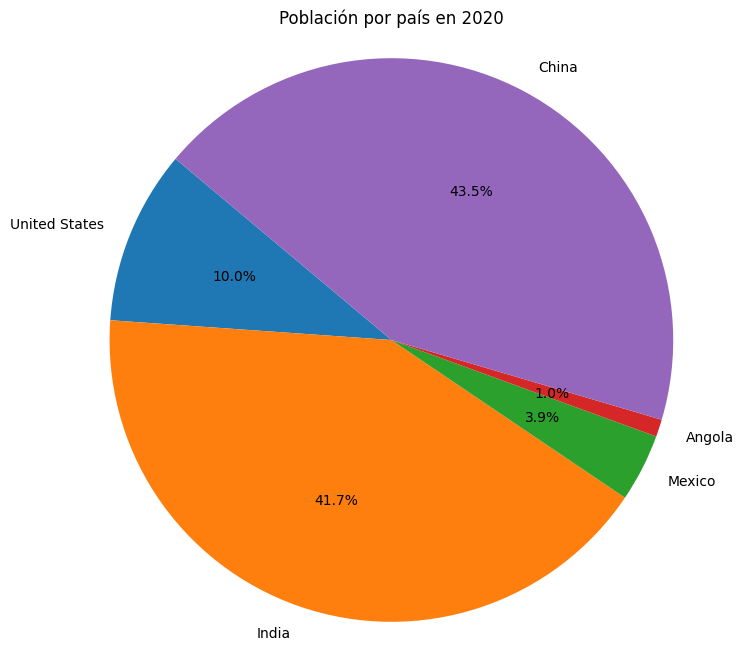

In [31]:
df_population_2020 = df_population_2020.reset_index()
df_population_2020 = df_population_2020.rename(columns={2020: '2020'})

# Gráfico de pastel con matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(
    df_population_2020['2020'],
    labels=df_population_2020['country'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Población por país en 2020')
plt.axis('equal')
plt.show()

In [ ]:
#scatterplot
